variance =  337.0724310285416
lag1 =  0.72


/home/lucas/Projetos/Pibic/.venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


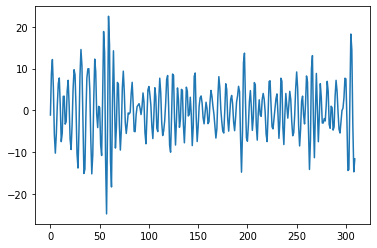

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#importação de modulos

import numpy as np
from waveletFunctions import wavelet, wave_signif
import matplotlib.pylab as plt
import matplotlib as mpl
import pandas as pd
from matplotlib import colorbar


colunas = range(1, 15, 2)
local = 'dados/dados/cachoeira/mean_day.200801-200811.brazil.zon'
dados = pd.read_csv(local, sep='\s+', skiprows=[0, 2], usecols=list(colunas)) 
sst = dados['90']
sst = np.array(sst.replace(np.nan, 0))
variance = (np.std(sst, ddof=1))** 2
print("variance = ", variance)    
if 0:
    variance = 1.0
    sst = sst / np.std(sst, ddof=1)
n = len(sst)

dt = 1.0 # Escala de tempo

time = np.arange(len(sst))+1   # construir minha escala temporal
xlim = ([0, len(sst)])  # plotting range
pad = 0  # pad the time series with zeroes (recommended)
dj = 0.125  # this will do 4 sub-octaves per octave
s0 = 1 * dt  # this says start at a scale of 6 months
j1 = 5 / dj  # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72  # lag-1 autocorrelation for red noise background
print("lag1 = ", lag1)
mother = 'MORLET'

# Wavelet transform:
wave, period, scale, coi = wavelet(sst, dt, pad, dj, s0, j1, mother)
wave = pd.DataFrame(wave.T, columns=scale.T)
lmin = np.float64(4)
lmax = np.float64(8)
Cdelta = 0.776
psi0 = np.pi**(-0.25)
colunas = [i for i in wave.columns.values if i >=lmin and i <=lmax]
filtro = wave.loc[:,colunas]
reconstruir = dj*np.sqrt(dt)/(Cdelta*psi0)*np.dot((filtro), 1/np.sqrt(colunas))
plt.plot(reconstruir)